In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
aer=pd.read_csv("aeroscan.csv")

In [5]:
aer.columns

Index(['Name', 'RF1a', 'RF1b', 'RF2a', 'RF2b', 'RF3a', 'RF3b', 'HF1a', 'HF1b',
       'HF2a', 'HF2b', 'HF3a', 'HF3b', 'RER1a', 'RER1b', 'RER2a', 'RER2b',
       'RER3a', 'RER3b', 'Fat1a', 'Fat1b', 'Fat2a', 'Fat2b', 'Fat3a', 'Fat3b',
       'Carb1a', 'Carb1b', 'Carb2a', 'Carb2b', 'Carb3a', 'Carb3b', 'Energy1a',
       'Energy1b', 'Energy2a', 'Energy2b', 'Energy3a', 'Energy3b'],
      dtype='object')

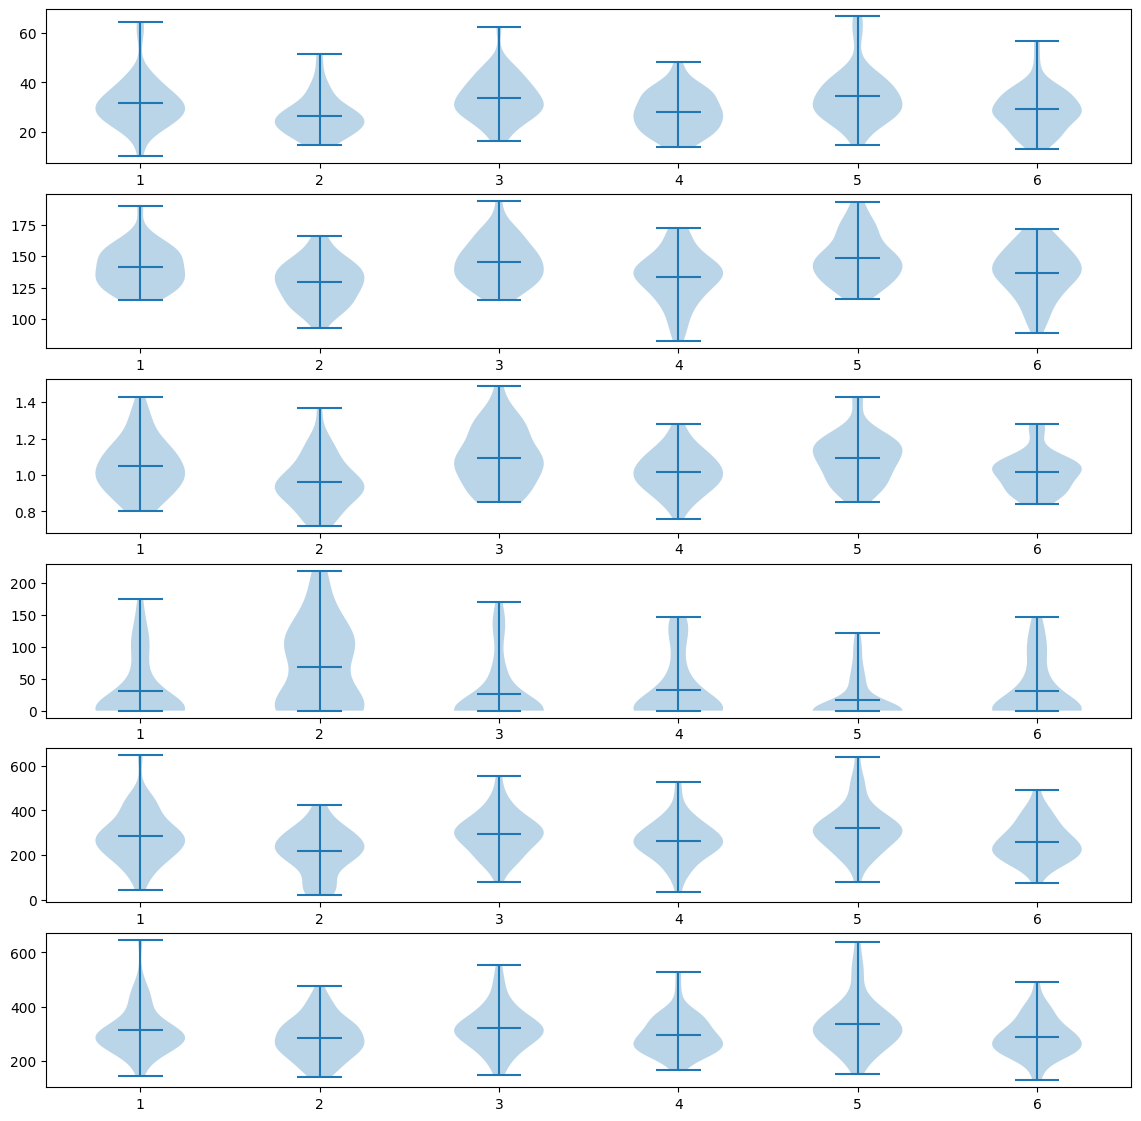

In [6]:
fig, ax = plt.subplots(nrows=6, figsize=(14,14))
for i in range(6):
    ax[i].violinplot(aer.iloc[:,i*6+1:(i+1)*6+1], showmeans=True)
    #ax[i].set_title('                            '.join(aer.columns[i*6+1:(i+1)*6+1]))
#plt.tight_layout()
#plt.savefig('aeroscan.png')
plt.show()

- [] List is a collection which is ordered and changeable. Allows duplicate members.
- () Tuple is a collection which is ordered and unchangeable. Allows duplicate members.
- {} Set is a collection which is unordered, unchangeable, and unindexed. No duplicate members.
- {:} Dictionary is a collection which is ordered (Python 3.6+) and changeable. No duplicate members.

# Accessors

In [7]:
aer.head(1)

,Name,RF1a,RF1b,RF2a,RF2b,RF3a,RF3b,HF1a,HF1b,HF2a,...,Carb2a,Carb2b,Carb3a,Carb3b,Energy1a,Energy1b,Energy2a,Energy2b,Energy3a,Energy3b
0,a1,43.26,34.79,38.75,36.63,42.77,36.52,130.47,139.3,132.91,...,153.75,131.87,293.6,221.07,303.82,250.43,292.23,257.61,354.84,259.75


# Native object/array accessors are column-first

In [8]:
type(aer.RF1a)

pandas.core.series.Series

In [9]:
type(aer['RF1a'])

pandas.core.series.Series

In [10]:
aer['RF1a'][1] #column, row

37.23

In [11]:
aer.RF1a[1] #column, row

37.23

> aer[1], 
> aer[1][1]
- invalid index error

## *Except for slices which are row-first

In [12]:
aer[:3]    #first 3 rows, not columns

,Name,RF1a,RF1b,RF2a,RF2b,RF3a,RF3b,HF1a,HF1b,HF2a,...,Carb2a,Carb2b,Carb3a,Carb3b,Energy1a,Energy1b,Energy2a,Energy2b,Energy3a,Energy3b
0,a1,43.26,34.79,38.75,36.63,42.77,36.52,130.47,139.30,132.91,...,153.75,131.87,293.60,221.07,303.82,250.43,292.23,257.61,354.84,259.75
1,a2,37.23,38.48,37.74,35.58,32.24,30.16,156.08,138.00,150.80,...,377.49,246.75,421.60,193.17,409.17,312.02,377.49,246.75,421.60,295.56
2,a3,32.18,20.69,33.83,19.58,37.64,20.25,160.77,142.38,167.83,...,272.76,310.30,304.53,325.40,295.49,312.11,272.76,310.30,304.53,325.40


In [13]:
aer[:3]['Name']   #first 3 rows, ID column, the slice changes the native accessor's order into .loc order

0    a1
1    a2
2    a3
Name: Name, dtype: object

In [15]:
aer['Name'][:3]   #this is the same in the array specific column-first call

0    a1
1    a2
2    a3
Name: Name, dtype: object

# .loc accessor is row-first

In [11]:
type(aer.loc[1])

pandas.core.series.Series

In [10]:
aer.loc[1, 'RF1a'] #row, column

37.23

> aer.loc['RF1a'], aer.loc[1, 1]
- invalid index error

1) .loc[0:10,:] will select entries 0,...,10
2) .iloc[0:10,:] will select entries 0,...,9

Additional selectors: .at, .iat (faster for single values), .get['col'].get['row']

In [34]:
aer = aer.set_index('Name')  # using drop=False you can keep the column used as index
aer.head(1)

,RF1a,RF1b,RF2a,RF2b,RF3a,RF3b,HF1a,HF1b,HF2a,HF2b,...,Carb2a,Carb2b,Carb3a,Carb3b,Energy1a,Energy1b,Energy2a,Energy2b,Energy3a,Energy3b
Name,,,,,,,,,,,,,,,,,,,,,
a1,43.26,34.79,38.75,36.63,42.77,36.52,130.47,139.3,132.91,142.35,...,153.75,131.87,293.6,221.07,303.82,250.43,292.23,257.61,354.84,259.75


# All label calling combinations

In [14]:
aer.RF1a.a1

43.26

In [18]:
aer['RF1a']['a1']

43.26

In [19]:
aer.RF1a['a1']

43.26

In [17]:
aer['RF1a'].a1

43.26

# Indices still work, but only for rows, and only for native accessors

In [20]:
aer.RF1a[0]

43.26

In [21]:
aer['RF1a'][0]

43.26

> aer['a1'], aer.a1, aer[1]
- directly calling rows does not work

> aer[1]["a1"], aer[1].a1
- columns are exclusively called by labels, rows are not, even if they have labels

In [37]:
aer.loc['a1','RF1a']

43.26

> aer.loc[1,'RF1a']
- calling rows by index does not work anymore since indices have labels